# 数据集分析

In [1]:
import os
import pandas as pd
import numpy as np
import jieba
import re
import string
import zhon.hanzi as hanzi
from jieba import analyse
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
""" 导入数据并删除标点符号、空格 """

dataset_url = './dataset'
train_url = os.path.join(dataset_url, 'train', 'data.txt')

sentence_list = []
with open (train_url, 'r', encoding='utf-8') as f:
    for line in f:
        sentence = line[line.find(',')+1:].rstrip("\n\r")
        sentence = re.sub('[{}]'.format(hanzi.punctuation), '', sentence)
        sentence = re.sub('[{}]'.format(string.punctuation), '', sentence)

        # print(sentence)
        label = int(line[0])
        sentence_list.append((sentence, label))

data = pd.DataFrame(sentence_list, columns=['comment', 'class'])

# 数据集的shape
print(data.shape) 
# 数据集的列名
print(data.columns.values)
# 不同类别数据记录的统计
print(data['class'].value_counts())

(10987, 2)
['comment' 'class']
0    7187
1    3800
Name: class, dtype: int64


In [3]:
""" 分词 """

cutted = []
for row in data.values:
    try:
        raw_words = (" ".join(jieba.cut(row[0])))
        cutted.append(raw_words)
    except AttributeError:
        print(row[0])
 
cutted_array = np.array(cutted)
 
# 生成新数据文件，Comment字段为分词后的内容
data_cutted = pd.DataFrame({
    'comment': cutted_array,
    'class': data['class']
})
print(data_cutted)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\86130\AppData\Local\Temp\jieba.cache
Loading model cost 0.965 seconds.
Prefix dict has been built successfully.


                                                 comment  class
0                        隔三差五 儿 的 就 点 两杯 味道 不错 送 餐员 辛苦 啦      1
1                                    嗯 送货 师傅 依然 很 负责 任 呢      1
2                                      速度 快 服务 好 必须 赞 一个      1
3                                     还 不错 送货 很快 味道 也 还好      1
4                       喜欢 哦 每天 都 在 喝 就是 昨天 忘 了 给 我 半糖 了      1
...                                                  ...    ...
10982                           以前 几乎 天天 吃 现在 调料 什么 都 不放      0
10983  昨天 订 凉皮 两份 什么 调料 都 没有 放 就 放 了 点 麻油 特别 难吃 丢 了 一...      0
10984                                        凉皮 太辣 吃不下 都      0
10985                                     本来 迟到 了 还 自己 点      0
10986      肉夹馍 不错 羊肉 泡馍 酱肉 包 很 一般 凉面 没 想象 中 好吃 送餐 倒 是 很快      0

[10987 rows x 2 columns]


In [4]:
""" 统计数据平均长度 """

total_len = 0
for i in data_cutted.index:
     i_list = data_cutted["comment"][i].split(' ')
     total_len += len(i_list)
print(total_len / len(data_cutted))

13.678074087558024


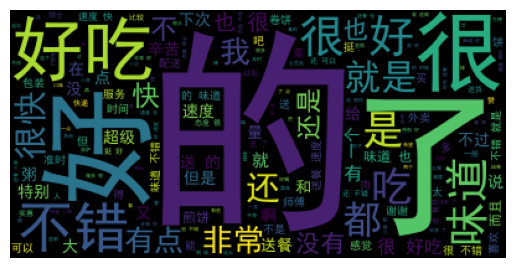

In [6]:
""" 可视化词频 """

# 好评
wc = WordCloud(font_path='SimHei.ttf')
wc.generate(''.join(data_cutted['comment'][data_cutted['class'] == 1]))
plt.axis('off')
plt.imshow(wc)
plt.show()

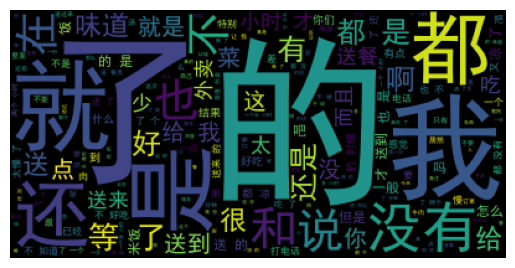

In [7]:
# 差评
wc = WordCloud(font_path='SimHei.ttf')
wc.generate(''.join(data_cutted['comment'][data_cutted['class'] == 0]))
plt.axis('off')
plt.imshow(wc)
plt.show()

In [8]:
""" 查看关键词 """

# 好评关键词
print('好评关键词：')
keywords_pos = jieba.analyse.extract_tags(''.join(data_cutted['comment'][data_cutted['class'] == 1]), topK=20)
for item in keywords_pos:
    print(item, end=' ')

# 差评关键词
print('\n差评关键词：')
keywords_neg = jieba.analyse.extract_tags(''.join(data_cutted['comment'][data_cutted['class'] == 0]), topK=20)
for item in keywords_neg:
    print(item, end=' ')

好评关键词：
好吃 送餐 不错 味道 小哥 速度 很快 外卖 非常 快递 辛苦 有点 配送 百度 包装 卷饼 就是 骑士 师傅 餐员 
差评关键词：
送餐 小时 难吃 味道 外卖 好吃 太慢 送到 送来 没有 差评 配送 百度 米饭 打电话 不错 一般 餐员 分钟 速度 

# 词向量预处理

In [11]:
""" 查找存在多个词向量的词 """
org_path = './dataset/sgns.sogou.word'
dst_path = './dataset/word2vec.txt'

from collections import Counter

word_list = []
with open(org_path, 'r', encoding='utf-8') as f:
    for line in f:
        word, embedding = line.split(maxsplit=1)
        word_list.append(word)

result=Counter(word_list)
print(result.most_common(755))

[('↑', 5), ('＂', 4), ('＠', 4), ('＝', 4), ('＃', 4), ('??', 4), (';', 4), ('＄', 4), ('＆', 4), ('｝', 4), ('→', 4), ('｛', 4), ('｜', 4), ('↓', 4), ('＝＝', 4), ('√', 4), ('＿', 3), ('(', 3), ('.', 3), ('＇', 3), ('[', 3), ('⊙', 3), ('「', 3), ('」', 3), ('°', 3), ('＼', 3), ('￥', 3), ('≥', 3), (';;', 3), ('＿＿', 3), ('≤', 3), ('■', 3), ('｀', 3), ('＇＇', 3), ('＿＿＿', 3), ('＿＿＿＿＿', 3), ('＾＿＾', 3), ('＿＿＿＿', 3), ('＿＿＿＿＿＿', 3), ('年', 2), ('都', 2), ('时', 2), ('向', 2), ('来', 2), ('元', 2), ('于', 2), ('小', 2), ('成', 2), ('高', 2), ('曾', 2), ('米', 2), ('张', 2), ('才', 2), ('区', 2), ('路', 2), ('车', 2), ('经', 2), ('应', 2), ('占', 2), ('余', 2), ('周', 2), ('强', 2), ('台', 2), ('那', 2), ('水', 2), ('原', 2), ('项', 2), ('令', 2), ('老', 2), ('全', 2), ('段', 2), ('王', 2), ('连', 2), ('万', 2), ('国', 2), ('李', 2), ('钱', 2), ('边', 2), ('金', 2), ('战', 2), ('赛', 2), ('支', 2), ('盘', 2), ('方', 2), ('少', 2), ('门', 2), ('任', 2), ('刚', 2), ('华', 2), ('山', 2), ('楼', 2), ('双', 2), ('西', 2), ('花', 2), ('南', 2), ('回', 2), ('东', 2), ('刘', 2)

In [12]:
""" 删除存在多个词向量的词，生成新的词向量 """
result_key_list = []
for i in result.most_common(755):
    result_key_list.append(i[0])
print(result_key_list)

dst_f = open(dst_path, "a+", encoding="utf-8")
with open(org_path, 'r', encoding='utf-8') as f:
    for line in f:
        word, embedding = line.split(maxsplit=1)
        if word not in result_key_list:
            dst_f.write(line)
dst_f.close() 

['↑', '＂', '＠', '＝', '＃', '??', ';', '＄', '＆', '｝', '→', '｛', '｜', '↓', '＝＝', '√', '＿', '(', '.', '＇', '[', '⊙', '「', '」', '°', '＼', '￥', '≥', ';;', '＿＿', '≤', '■', '｀', '＇＇', '＿＿＿', '＿＿＿＿＿', '＾＿＾', '＿＿＿＿', '＿＿＿＿＿＿', '年', '都', '时', '向', '来', '元', '于', '小', '成', '高', '曾', '米', '张', '才', '区', '路', '车', '经', '应', '占', '余', '周', '强', '台', '那', '水', '原', '项', '令', '老', '全', '段', '王', '连', '万', '国', '李', '钱', '边', '金', '战', '赛', '支', '盘', '方', '少', '门', '任', '刚', '华', '山', '楼', '双', '西', '花', '南', '回', '东', '刘', '平', '党', '房', '罗', '海', '林', '学', '力', '费', '黄', '马', '管', '赵', '许', '单', '易', '代', '风', '吴', '唐', '银', '真', '文', '游', '京', ')', '包', '陈', '谈', '广', '班', '古', '步', '完', '满', '杨', '龙', '常', '卫', '员', '白', '商', '星', '师', '相', '清', '欧', '展', '牛', '泰', '保', '居', '石', '明', '友', '范', '季', '斯', '江', '考', '安', '戴', '景', '朝', '梦', '英', '定', '徐', '钟', '铁', '世', '宋', '运', '权', '阿', '乐', '何', '利', '宝', '招', '云', '沙', '叶', '遇', '齐', '青', '孙', '查', '宜', '夏', '刀', '韩', '朱', '封', '关', '雷', '郑', '康'